# ML Pipeline for Adult Census Data

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Load and Format Data

In [198]:
census = pd.DataFrame.from_csv('adult.csv', index_col=None)

In [200]:
# replace '.' in heading columns

census.columns = census.columns.str.replace(".", "_")

In [202]:
# re-format income values; 1 = greater than 50k, 0 = less than 50k

census.income = census.income.str.replace('>50K', '1')
census.income = census.income.str.replace('<=50K', '0')
census.income = census.income.astype('int64')

In [203]:
# replace '?'s in data with NaNs

census = census.replace(to_replace='?',value=np.nan)

In [350]:
# fill in null birth country information with 'United-States'; it is the most common 
census.native_country = census.native_country.fillna('United-States')

### Explore Data

In [204]:
#identify data types of columns 

g = census.columns.to_series().groupby(census.dtypes).groups
print(g)

{dtype('int64'): Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income'],
      dtype='object'), dtype('O'): Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')}


In [205]:
census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [207]:
# define numeric and categorical variables

num_var = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income']

cat_var = ['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']

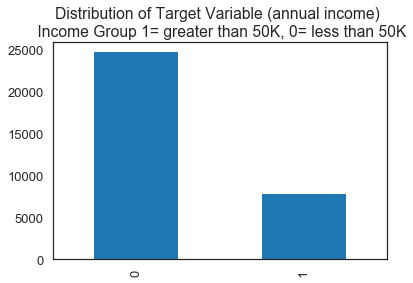

In [313]:
# count target variable

sns.set_context("talk")
sns.set_style("white")

census['income'].value_counts().plot.bar()
plt.title('Distribution of Target Variable (annual income) \n Income Group 1= greater than 50K, 0= less than 50K')
plt.show()

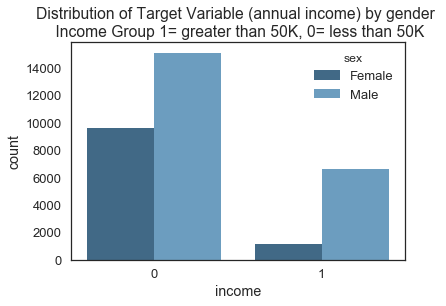

In [312]:
# count target variable
sns.set_context("talk")
sns.set_style("white")

sns.countplot(x="income", hue="sex", data=census, palette="Blues_d")
plt.title('Distribution of Target Variable (annual income) by gender \n Income Group 1= greater than 50K, 0= less than 50K')
plt.show()

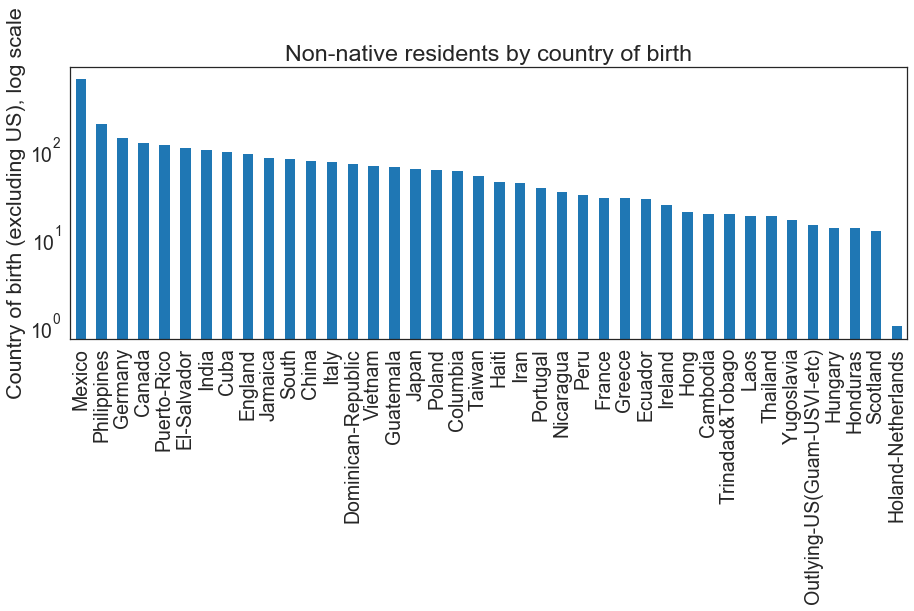

In [316]:
# plotting country of birth

sns.set_context("talk", font_scale=1.5)
sns.set_style("white")
plt.figure(figsize=(15,5))
census[census.native_country != 'United-States']['native_country'].value_counts().plot.bar()
plt.yscale('log') # log scale because the prevalence of some countries (Mexico) mask trends
plt.ylabel('Country of birth (excluding US), log scale')
plt.title('Non-native residents by country of birth')
plt.show()

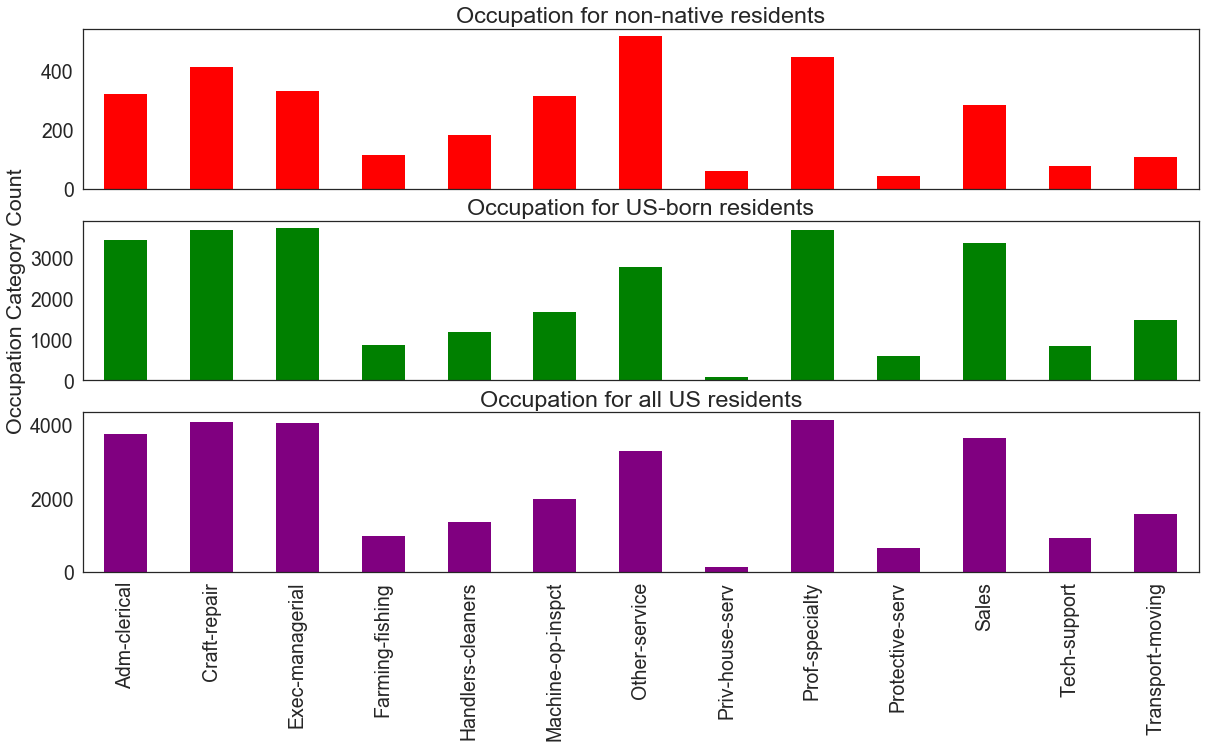

In [250]:
# plotting occupation for non-native residents

sns.set_context("talk", font_scale=1.5)
sns.set_style("white")
fig = plt.figure(figsize=[20, 10])

fig.add_subplot(3,1,1)
census[(census.native_country != 'United-States') & 
       (census.occupation != 'Armed-Forces')]['occupation'].value_counts().sort_index().plot.bar(
    color='red',sort_columns=True)
#plt.ylabel('Occupation for non-native residents')
plt.xticks([])
plt.title('Occupation for non-native residents')

fig.add_subplot(3,1,2)
census[(census.native_country == 'United-States') & 
       (census.occupation != 'Armed-Forces')]['occupation'].value_counts().sort_index().plot.bar(color = 'green',sort_columns=True)
plt.ylabel('Occupation Category Count')
plt.xticks([])
plt.title('Occupation for US-born residents')

fig.add_subplot(3,1,3)
census[census.occupation!='Armed-Forces']['occupation'].value_counts().sort_index().plot.bar(color = 'purple',sort_columns=True)
#plt.ylabel('Occupation for all residents')
plt.title('Occupation for all US residents')

plt.show()

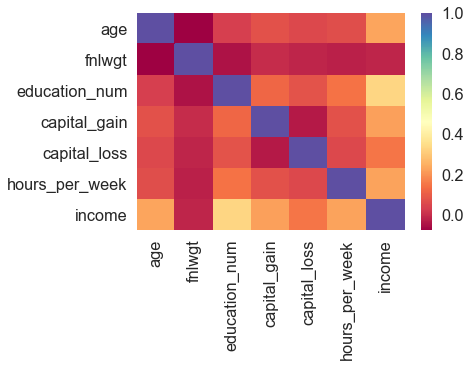

In [209]:
# Correlation matrix between numerical values
g = sns.heatmap(census[num_var].corr(), cmap = "Spectral")
plt.show()

In [215]:
# calc correlation coefficient
census[num_var].corr(method='pearson')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


Some small and medium correlations in the numeric data

Small correlations: 
education and capital_gain (0.122)
education and hours_per_week (0.148)
age and income (0.234)
capital_gain and income(0.223)
capital_lost and income (0.151)
income and hours_per_week (.230)

Medium correlation:
education and income (0.335)


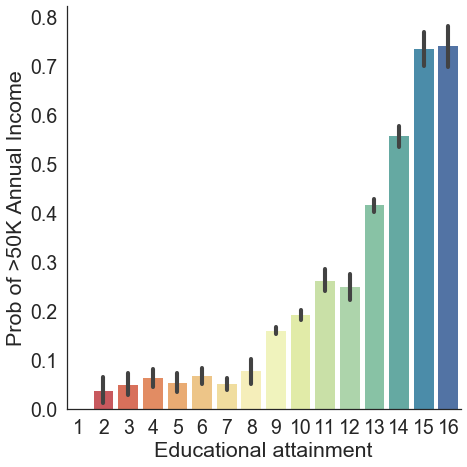

In [251]:
# Explore Education Num vs Income
g = sns.factorplot(x="education_num", y="income",data=census, kind="bar",size = 7, palette = "Spectral")
g.set_ylabels("Prob of >50K Annual Income")
g.set_ylabels("Prob of >50K Annual Income")
g.set_xlabels("Educational attainment")
plt.show()

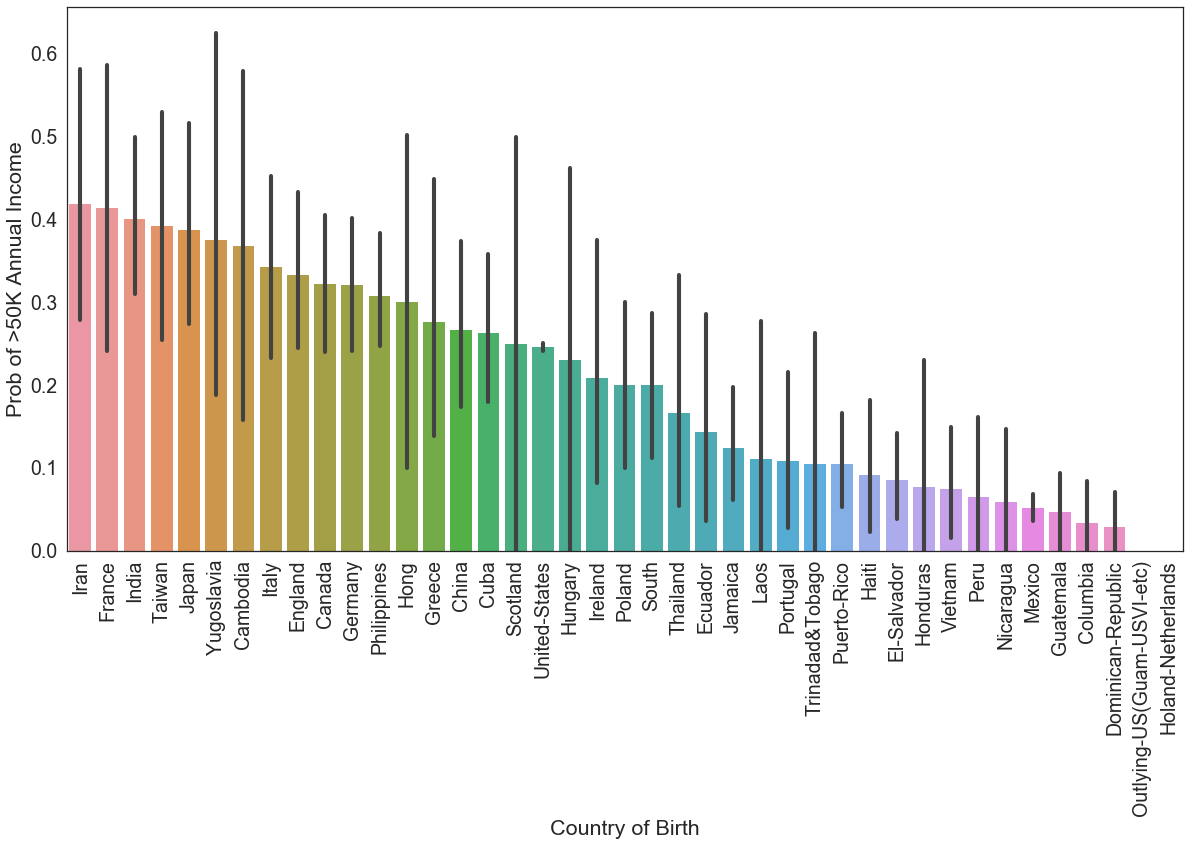

In [293]:
# Explore country of birth and probability of >50K annual income

fig = plt.figure(figsize=[20, 10])

income_prob_ranked = list(((census.groupby('native_country')['income'].mean()).sort_values(ascending=False)).index)
g = sns.barplot(x="native_country",y="income",data=census, order =income_prob_ranked)
g.set_ylabel("Prob of >50K Annual Income")
g.set_xlabel('Country of Birth')
plt.xticks(rotation=90)

plt.show()

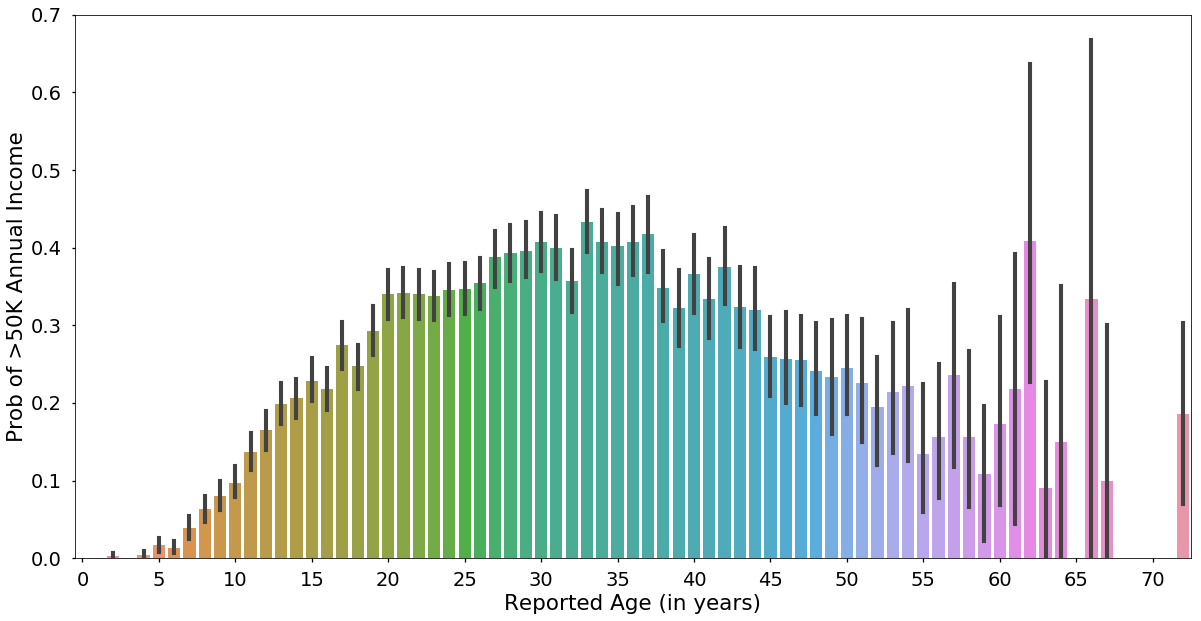

In [299]:
# Explore country of birth and probability of >50K annual income

import matplotlib.ticker as ticker
fig = plt.figure(figsize=[20, 10])
sns.set_context("talk", font_scale=1.5)


g = sns.barplot(x="age",y="income",data=census)
g.set_ylabel("Prob of >50K Annual Income")
g.set_xlabel('Reported Age (in years)')
g.xaxis.set_major_locator(ticker.MultipleLocator(5))
g.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

### Model the Data

#### Remove unwanted varaibles and Create dummies for categorical variables

In [556]:
# create copy of df for modification
census_copy = census.copy(deep=True)

In [557]:
# keep variables with some level of correlation and some demographic features that interest me
census_copy = census_copy[['hours_per_week', 'age', 'fnlwgt', 'education_num',
       'race', 'sex', 'capital_gain', 'capital_loss', 'native_country', 'income']]

In [558]:
# new test; removed even more variables
#census_copy = census_copy[['hours_per_week', 'age', 'education_num','sex', 
#                           'capital_gain', 'capital_loss', 'income']]

In [559]:
# create new list of categorical variables
new_cat_var = []
for var in cat_var:
    if var in census_copy.columns:
        new_cat_var.append(var)

In [560]:
# create dummy variables for categorical data and remove categorical columns
census_copy = pd.concat([pd.get_dummies(census_copy[new_cat_var]), census_copy.drop(census_copy[new_cat_var], axis=1)], axis=1)

In [561]:
len(census_copy.columns)

55

#### Split the training and validation set

In [562]:
# import modeling packages

from sklearn.model_selection import *

In [564]:
# create arrays of data and target

array = census_copy.values
X = array[:,0:54] # model data includes all features
Y = array[:,54] # target is income group

validation_size = 0.30 # validate on 30% of the data

X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=42)

In [565]:
# build SGD classifier

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [566]:
# score classifier
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([ 0.78020532,  0.79191893,  0.79436546])

In [567]:
# establish baseline of 'null' classifier
from sklearn.base import BaseEstimator

class Never_above_50(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [568]:
# fit baseline model and score
never_above_50_clf = Never_above_50()
cross_val_score(never_above_50_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([ 0.75822585,  0.75411347,  0.76359089])

So the 'off the shelf' SGDclassifier isn't much better than the baseline model. The 'positive' case only occurs 24.08% of the time, so if you always guess 'below 50K' you're correct 75.8% of the time.... Let's try some other things

In [569]:
# calculating the baseline of the positive case
(census.income.sum()) / (census.income.count())

0.24080955744602439

### Let's take a look at the confusion matrix

In [570]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train, cv=3)

In [571]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train, y_train_pred)

array([[16768,   523],
       [ 4290,  1211]])

The confusion matrix shows that we have lots of false negatives (4290) and a few false positives (523).

In [572]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_train, y_train_pred)

0.69838523644752015

In [573]:
recall_score(Y_train, y_train_pred)

0.22014179240138157

In [574]:
from sklearn.metrics import f1_score
f1_score(Y_train, y_train_pred)

0.33476157567380788

In [575]:
y_scores = cross_val_predict(sgd_clf, X_train, Y_train, cv=3,
                             method="decision_function")

In [576]:
y_scores.ndim

1

In [577]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_train, y_scores)

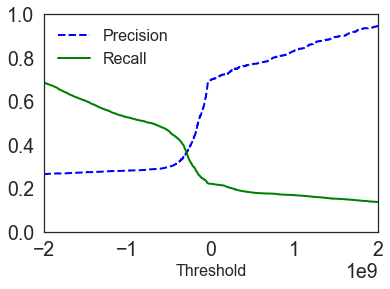

In [579]:
# plot precision and recall by threshold. this model sucks!
import matplotlib.pyplot as plt
plt.plot(thresholds,precisions[0:22762], 'b--', label="Precision", linewidth=2)
plt.plot(thresholds,recalls[0:22762], 'g-', label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.xlim([-2000000000, 2000000000])
plt.ylim([0, 1])
plt.show()

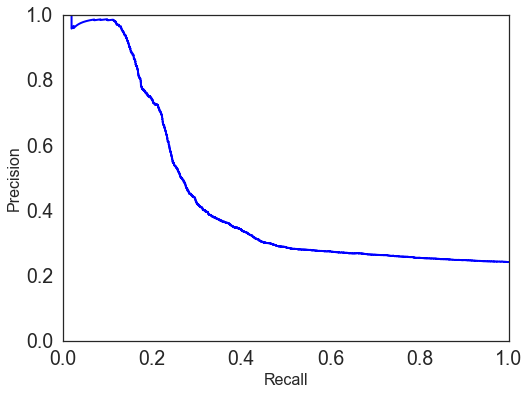

In [580]:
# plot precision and recall
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### Plot ROC curve

In [581]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_train, y_scores)

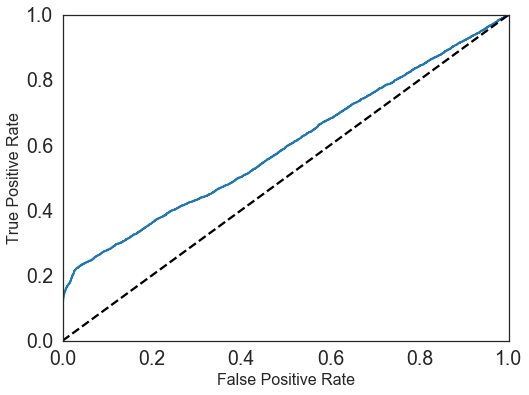

In [582]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

### Now train a Random Forest Classifier to compare

In [583]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, Y_train, cv=3,
                                    method="predict_proba")

In [584]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train,y_scores_forest)

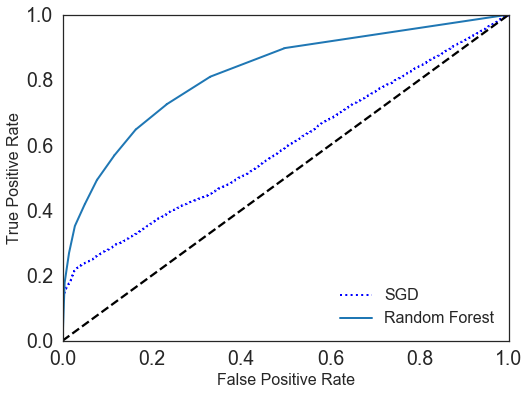

In [587]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [589]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train, y_scores_forest)

0.8186867533540596

In [590]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, Y_train, cv=3)
precision_score(Y_train, y_train_pred_forest)

0.66954377311960545

In [591]:
recall_score(Y_train, y_train_pred_forest)

0.49354662788583892

## So, the model still isn't great (roc_auc is 0.818), but random forest has much better recall than SVG classifier

In [594]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=42)
y_probas_lr = cross_val_predict(lr_clf, X_train, Y_train, cv=3,
                                    method="predict_proba")

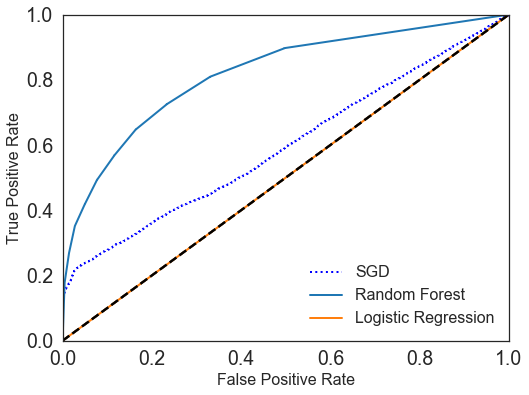

In [598]:
y_scores_lr = y_probas_lr[:, 1] # score = proba of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_train,y_scores_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_lr, fpr_lr, "Logistic Regression")

plt.legend(loc="lower right", fontsize=16)
plt.show()

### Additional considerations

look at the types of errors made by the models (as outlined in the classification models)

definition of variables:

Age Continuous; House holder’s age
Hours-per-week Continuous; House holder’s working hours per week
Education_ num Continuous; House holder’s years of education
Capital-gain Continuous; House holder’s investment income
Capital-loss Continuous; House holder’s investment loss
Fnlwgt Continuous; Estimated number of people in the population that the sample person represents in a specific reference period.
Workclass Never-work, Without-pay, Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, and State-gov.
Education_categ Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, 12th, HS-grad, Some-college, Assoc-voc, Assoc-acdm, Bachelors, Master, Prof-school, and Doctorate.
Marital-status Never-married, Separated, Widowed, Divorced, Married-spouse-absent, Married-AF-spouse, Married-civ-spouse, and Married-AF-spouse.
Occupation Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transportmoving,
Priv-house-serv, Protective-serv, and Armed-Forces.
Race White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, and Black.
Relationship Wife, Own-child, Husband, Not-in-family, Other-relative, and Unmarried
Sex Female, and Male.
Native-country United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad & Tobago, Peru, Hong, and Holand-Netherlands.
Income ≥50K, and <50K; Total money income of family

In [ ]:
https://www.census.gov/prod/2003pubs/censr-5.pdf